# t-тест

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

df = pd.read_csv('Data/Running.csv')
df.head()

,Athlete,MileMinDur
0,0,0:06:21
1,0,0:07:00
2,0,0:12:44
3,1,0:06:25
4,1,0:07:24


### Параметры теста:
* Двусторонний тест
* alpha = 0.05
* Критическое значение t-критерия: ±1.9667
* Критическая область: (-∞, -1.9667] ∪ [1.9667, ∞)

In [2]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667

$
\begin{align}
t = \frac{(M_1 - M_2) - (\mu_1 - \mu_2)}{s_{(M_1 - M_2)}}
\end{align}
$


$
\begin{align}
s_{(M_1 - M_2)} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}
\end{align}
$

### Поправка Уэлча
$
\begin{align}
df = \frac{(V_1 + V_2)^2}{\frac{V^2_1}{n_1 - 1} + \frac{V^2_2}{n_2 - 1}}
\end{align}
$

$
V_1 = \frac{s^2_1}{n_1}
$

$
V_2 = \frac{s^2_2}{n_2}
$

In [3]:
df['MileSecDur'] = df['MileMinDur'].apply(lambda x: int(x.split(':')[1])*60 + int(x.split(':')[2]))

In [4]:
athletes = df[df['Athlete'] == 1]['MileSecDur']
non_athletes = df[df['Athlete'] == 0]['MileSecDur']

<AxesSubplot:>

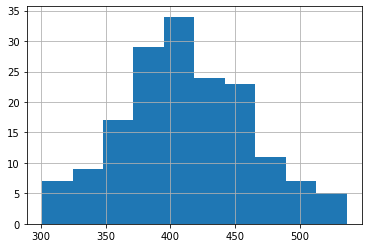

In [5]:
athletes.hist()

<AxesSubplot:>

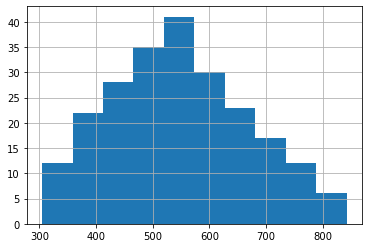

In [6]:
non_athletes.hist()

In [7]:
athletes.var()

2444.858853596203

In [8]:
non_athletes.var()

14802.27848574238

In [9]:
n_1 = len(non_athletes)
n_2 = len(athletes)
print(n_1, n_2)

226 166


In [37]:
mean_1 = non_athletes.mean()
mean_2 = athletes.mean()
print(mean_1, mean_2)

546.1017699115044 411.31325301204816


In [38]:
var_1 = non_athletes.var()
var_2 = athletes.var()
print(var_1, var_2)

14802.27848574238 2444.858853596203


In [39]:
s_m1_m2 = np.sqrt(var_1/n_1 + var_2/n_2)
print(s_m1_m2)

8.956833862596019


In [40]:
t = (mean_1 - mean_2) / s_m1_m2
print(t)

15.048678915697742


In [41]:
v_1 = var_1/n_1
v_2 = var_2/n_2

df_welch = (v_1 + v_2)**2 / (v_1**2 / (n_1 - 1) + v_2**2 / (n_2 - 1))
print(df_welch)
print(int(df_welch))

315.7925948972666
315


In [42]:
df_student = n_2 + n_1 - 2
print(df_student)

390


In [22]:
import scipy.stats

In [43]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1, 
                                 mean_2, np.sqrt(var_2), n_2, equal_var=False)

Ttest_indResult(statistic=15.048678915697742, pvalue=5.824578890260176e-39)

In [52]:
scipy.stats.ttest_ind(non_athletes, athletes, equal_var=False)

Ttest_indResult(statistic=15.048678915697742, pvalue=5.82457889026026e-39)

In [53]:
p_value = scipy.stats.ttest_ind(non_athletes, athletes, equal_var=False)[-1]

In [60]:
hypothesis_check(p_value, t_critical)

Отвергаем Н0. Разница между средними статистически значима.
